# Promoter region methylation probe clustering
## Mamie Wang (szmamie@stanford.edu)
## 2018/03/08

This note aims to examine the results of hierarchical clustering of the HM450K methylation probes. 

The clustering procedure is as follows:

- subset probes that are between 200 - 1500 base upstream of the transcription start site (`TSS1500` in `UCSC_RefGene_Group`)
- for probes that correspond to the same gene average the methylation profile
- perform hierarchical clustering with euclidean distance and `ward.D2` method

The source code for the clustering procedure was in `../R/regressionModel/regressionModel.R`


### Load the clustering data

In [26]:
library(fossil)

Loading required package: sp
Loading required package: maps
Loading required package: shapefiles
Loading required package: foreign

Attaching package: ‘shapefiles’

The following objects are masked from ‘package:foreign’:

    read.dbf, write.dbf



In [30]:
load('../data/180307_M/HM450/resultsM/clusterInfo.RData')

The number of merged promoter-region methylation probes is

In [31]:
length(clustering$cluster) 

[1] 18261

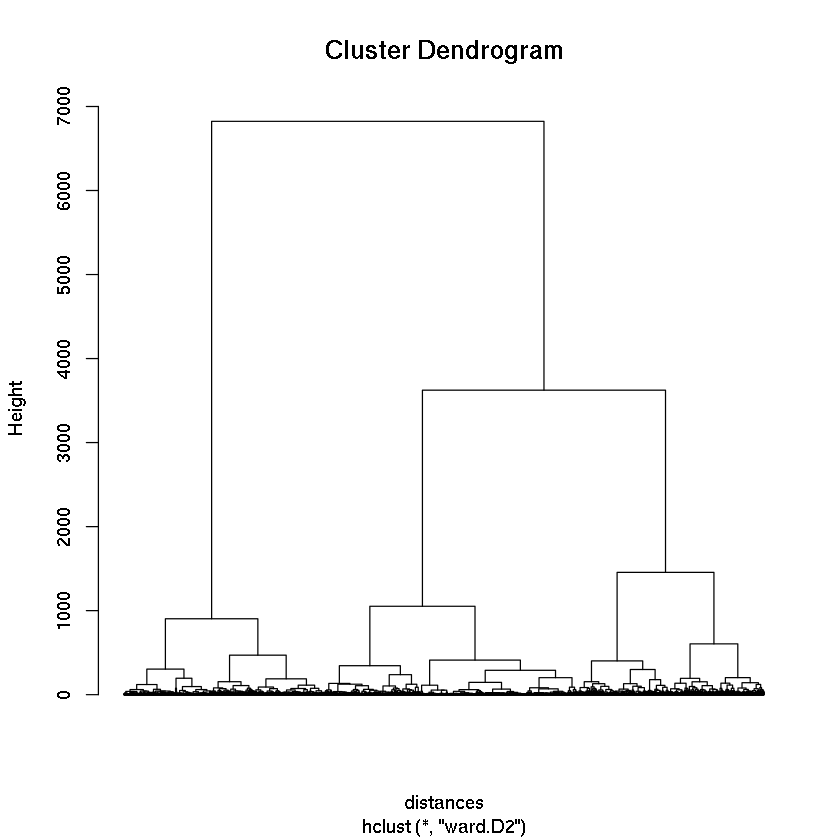

In [32]:
plot(clustering$hclust, hang = -1, cex = 0.001)

In [33]:
sort(table(clustering$cluster), decreasing=T)


   9    8    2    1    5   13    7    3   10   15   17   18   14    4   16   11 
2263 1585 1462 1250 1238 1174 1043  954  947  847  820  771  743  622  616  554 
   6   12   19   20 
 540  478  277   77 

In [34]:
HM450.clusterM <- clustering$cluster
ordering <- order(names(clustering$cluster))
HM450.clusterM <- clustering$cluster[ordering]

In [37]:
HM450.clusterM[1:5]

cg00000029 cg00000321 cg00001510 cg00001582 cg00001854 
         1          2          3          2          4

## Clustering for beta values

In [38]:
load('../data/180307_M/HM450/resultsB/clusterInfo.RData')

In [39]:
length(clustering$cluster) 

[1] 18261

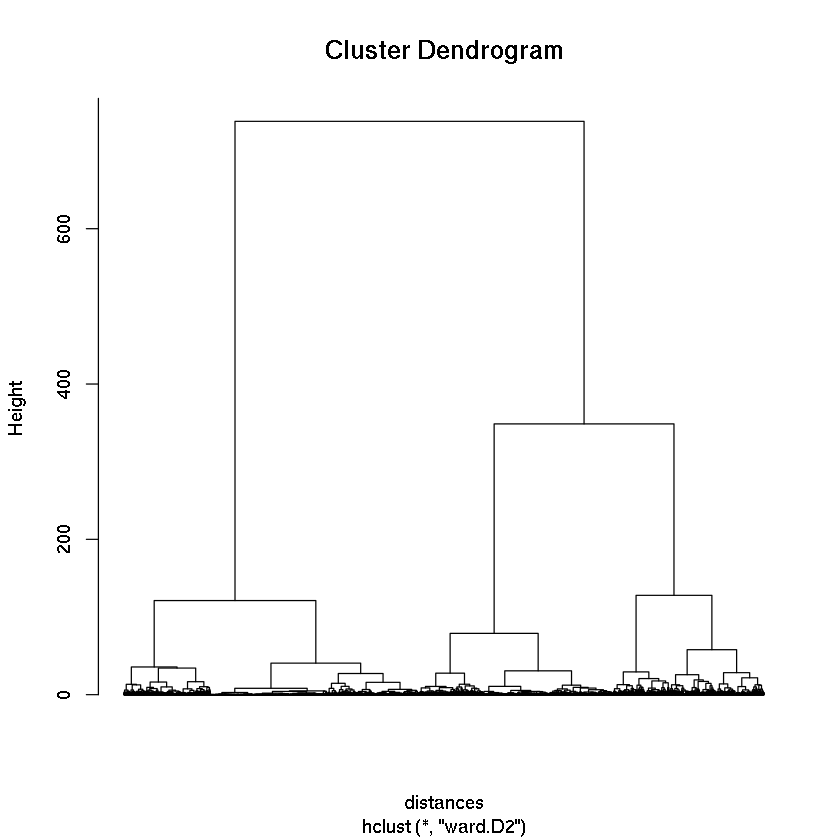

In [40]:
plot(clustering$hclust, hang = -1, cex = 0.001)

In [41]:
sort(table(clustering$cluster), decreasing=T)


   8    7    2   10   15   16    3    5   14    1    4   19   17   18    9   11 
3359 1893 1833 1817 1020  980  864  807  778  655  621  608  548  516  484  459 
   6   13   20   12 
 351  242  237  189 

In [42]:
HM450.clusterB <- clustering$cluster
ordering <- order(names(clustering$cluster))
HM450.clusterB <- clustering$cluster[ordering]

In [43]:
HM450.clusterB[1:5]

cg00000029 cg00000321 cg00001510 cg00001582 cg00001854 
         1          2          3          2          4

In [ ]:
rand.index(HM450.clusterM, HM450.clusterB)

The code was ran in `/R/regressionModel/compareClustering.R` and the rand index is $0.922723568977585$. The clustering using the two distances is almost identical

## HM 27 data

In [18]:
load('../data/180307_M/HM27/resultsM/clusterInfo.RData')

In [19]:
length(clustering$cluster) 

[1] 6279

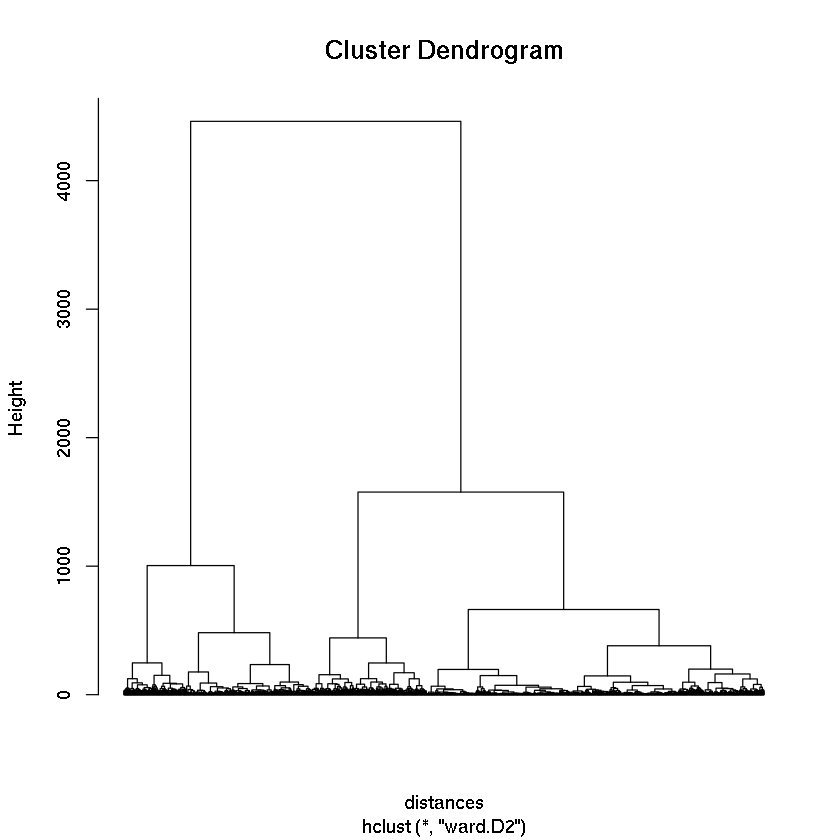

In [20]:
plot(clustering$hclust, hang = -1, cex = 0.001)

In [21]:
sort(table(clustering$cluster), decreasing=T)


  8   5  16   6  10   3   2   7   1   9  14  12   4  17  11  15  13  18  20  19 
816 684 487 414 384 368 365 358 329 280 278 274 244 238 226 156 137 101  81  59 

In [ ]:
HM27.clusterM <- clustering$cluster
ordering <- order(names(clustering$cluster))
HM27.clusterM <- clustering$cluster[ordering]

### HM 27 (beta)

In [22]:
load('../data/180307_M/HM27/resultsB/clusterInfo.RData')

In [24]:
length(clustering$cluster) 

[1] 6279

In [23]:
sort(table(clustering$cluster), decreasing=T)


   6    8    3   14   15    4    5    7   16   11   17    1   13    2   19   12 
1820 1070  526  341  263  250  244  224  215  181  179  163  161  119  111  102 
  20   10   18    9 
 100   95   77   38 

In [ ]:
HM27.clusterB <- clustering$cluster
ordering <- order(names(clustering$cluster))
HM27.clusterB <- clustering$cluster[ordering]

Comparing the rand index between the two clustering using different distance metrics

In [ ]:
rand.index(HM27.clusterM, HM27.clusterB)

The code was ran also in `/R/regressionModel/compareClustering.R` and the rand index is $0.883055220146789$. The clustering using the two distances is similar